**Analiza COVID-19 w Polsce**

COVID-19 (od ang. Coronavirus Disease 2019)[5] – ostra choroba zakaźna układu oddechowego wywołana zakażeniem wirusem SARS-CoV-2. Została po raz pierwszy rozpoznana i opisana podczas serii zachorowań, która rozpoczęła się w grudniu 2019 roku.

Stanowisko WHO na podstawie danych z 3 marca 2020 mówi o śmiertelności na poziomie 3,4%. 30 stycznia 2020 roku WHO ogłosiło stan zagrożenia dla zdrowia publicznego o zasięgu międzynarodowym w wyniku rozprzestrzeniającej się epidemii COVID-19. 11 marca 2020 WHO uznała serię zachorowań na COVID-19 występującą od grudnia 2019 za pandemię.

Dane na dzien 19.05.2020

Wskaznik wzrostu: 0.992

Prognozy:
* 2020-05-20	10104
* 2020-05-21	10126
* 2020-05-22	10146
* 2020-05-23	10164

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
import plotly.graph_objs as go

import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/poland-flu-2020/poland_flu_2020.csv
/kaggle/input/polandcovid19tests/poland_covid-19_tests.csv
/kaggle/input/poland-covid19-summary/poland_covid-19_summary.csv


Pierwsze przypadki w Polsce 

In [2]:
poland_covid_19_summary = pd.read_csv('../input/poland-covid19-summary/poland_covid-19_summary.csv', index_col='date', parse_dates=True)
poland_covid_19_summary['active'] = poland_covid_19_summary.sick - (poland_covid_19_summary.dead + poland_covid_19_summary.cured)
poland_covid_19_summary.head()

,sick,dead,cured,active
date,,,,
2020-03-03,0,0,0,0
2020-03-04,1,0,0,1
2020-03-05,1,0,0,1
2020-03-06,5,0,0,5
2020-03-07,6,0,0,6


Najnowsze przypadki w Polsce

In [3]:
poland_covid_19_summary.tail()

,sick,dead,cured,active
date,,,,
2020-05-15,18016,907,6918,10191
2020-05-16,18257,915,7175,10167
2020-05-17,18529,925,7451,10153
2020-05-18,18885,936,7628,10321
2020-05-19,19080,941,7903,10236


In [4]:
poland_covid_19_summary["change"] = poland_covid_19_summary.active.diff()
poland_covid_19_summary["growth"] = poland_covid_19_summary.active.div(other=poland_covid_19_summary.active.shift(1))

poland_covid_19_summary.tail()

,sick,dead,cured,active,change,growth
date,,,,,,
2020-05-15,18016,907,6918,10191,155.0,1.015444
2020-05-16,18257,915,7175,10167,-24.0,0.997645
2020-05-17,18529,925,7451,10153,-14.0,0.998623
2020-05-18,18885,936,7628,10321,168.0,1.016547
2020-05-19,19080,941,7903,10236,-85.0,0.991764


Testy w Polsce

In [5]:
poland_covid_19_tests = pd.read_csv('../input/polandcovid19tests/poland_covid-19_tests.csv', index_col='date', parse_dates=True)

tests_scatter = go.Scatter(
    x = poland_covid_19_tests.index,
    y = poland_covid_19_tests.tests,
    mode = "lines",
    name = "Testy lacznie",
    marker = dict(color = 'green'))

data = [tests_scatter]
layout = dict(title = 'Statystyka testow COVID-19 w Polsce',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Testy',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

In [6]:
poland_covid_19_tests['factor'] = poland_covid_19_tests.tests / poland_covid_19_tests.positive
poland_covid_19_tests

,tests,positive,negative,factor
date,,,,
2020-03-03,559,0,559,inf
2020-03-04,584,1,583,584.000000
2020-03-05,676,1,675,676.000000
2020-03-06,855,1,854,855.000000
2020-03-07,855,1,854,855.000000
...,...,...,...,...
2020-05-15,576276,17850,558426,32.284370
2020-05-16,601394,18184,583210,33.072701
2020-05-17,620249,18394,601855,33.720180


**Wykres osob zarazonych, wyleczonych i zgonow**

In [7]:
poland_covid_19_summary.rename(columns={'sick': 'Chorzy', 'dead': 'Zmarli', 'cured': 'Wyleczeni'}, inplace=True)

sick_scatter = go.Scatter(
    x = poland_covid_19_summary.index,
    y = poland_covid_19_summary.Chorzy,
    mode = "lines",
    name = "Wszystkie przypadki",
    marker = dict(color = 'blue'))

active_scatter = go.Scatter(
    x = poland_covid_19_summary.index,
    y = poland_covid_19_summary.active,
    mode = "lines",
    name = "Aktywne przypadki",
    marker = dict(color = 'orange'))

dead_scatter = go.Scatter(
    x = poland_covid_19_summary.index,
    y = poland_covid_19_summary.Zmarli,
    mode = "lines",
    name = "Zmarli",
    marker = dict(color = 'red'))

cured_scatter = go.Scatter(
    x = poland_covid_19_summary.index,
    y = poland_covid_19_summary.Wyleczeni,
    mode = "lines",
    name = "Wyleczeni",
    marker = dict(color = 'green'))

#plt.figure(figsize=(16,8))
#sns.lineplot(data=poland_covid_19_summary).set(title = 'COVID-19 - Podsumowanie', xlabel = 'Data', ylabel = 'Ludzie' )

data = [sick_scatter, active_scatter, dead_scatter, cured_scatter]
layout = dict(title = 'Statystyka COVID-19 w Polsce',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Ludzie',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

In [8]:
tests_scatter_normalized = go.Scatter(
    x = poland_covid_19_tests.index,
    y = poland_covid_19_tests.tests / max(poland_covid_19_tests.tests),
    mode = "lines",
    name = "Testy lacznie",
    marker = dict(color = 'green'))

sick_scatter_normalized = go.Scatter(
    x = poland_covid_19_summary.index,
    y = poland_covid_19_summary.Chorzy / max(poland_covid_19_summary.Chorzy),
    mode = "lines",
    name = "Wszystkie przypadki",
    marker = dict(color = 'blue'))

data = [sick_scatter_normalized, tests_scatter_normalized]
layout = dict(title = 'Znormalizowane porownanie testow i potwierdzonych przypadkow COVID-19 w Polsce',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Ludzie',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

In [9]:
poland_covid_19_tests_diff = poland_covid_19_tests.diff()

tests_daily = {
  'x': poland_covid_19_tests_diff.index,
  'y': poland_covid_19_tests_diff.tests,
  'name': 'Testy',
  'type': 'bar',
  'marker': dict(color = 'blue')
};

data = [tests_daily];
layout = {
  'xaxis': {'title': 'Data'},
  'barmode': 'relative',
  'title': 'Ilosc testow dziennie'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

pass

In [10]:
data = [sick_scatter, active_scatter]
layout = dict(title = 'Statystyka COVID-19 w Polsce (log)',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Ludzie (log)',ticklen= 5,zeroline= False),
              yaxis_type='log'
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

In [11]:
data = [dead_scatter, cured_scatter]
layout = dict(title = 'Statystyka COVID-19 w Polsce (Wyleczeni vs. Zgony)',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Ludzie',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

In [12]:
resp_scatter = go.Scatter(
    x = poland_covid_19_summary.index,
    y = [10000] * len(poland_covid_19_summary.index),
    mode = "lines",
    name = "Respiratory",
    marker = dict(color = 'black'),
    line = dict(dash='dash'))

sick_hard_scatter = go.Scatter(
    x = poland_covid_19_summary.index,
    y = poland_covid_19_summary.Chorzy * 0.12,
    mode = "lines",
    name = "Ciezko chorzy",
    marker = dict(color = 'navy'))

sick_light_scatter = go.Scatter(
    x = poland_covid_19_summary.index,
    y = poland_covid_19_summary.Chorzy * 0.88,
    mode = "lines",
    name = "Lekko chorzy",
    marker = dict(color = 'blue'))

data = [sick_hard_scatter, sick_light_scatter, resp_scatter]
layout = dict(title = 'Statystyka COVID-19 w Polsce (Chorzy i ciezko chorzy)',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Ludzie',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

In [13]:
sick_trace = {
  'x': poland_covid_19_summary.index,
  'y': poland_covid_19_summary.active,
  'name': 'Chorzy',
  'type': 'bar',
  'marker': dict(color = 'blue')
};

dead_trace = {
  'x': poland_covid_19_summary.index,
  'y': poland_covid_19_summary.Zmarli,
  'name': 'Zmarli',
  'type': 'bar',
  'marker': dict(color = 'red')
};

cured_trace = {
  'x': poland_covid_19_summary.index,
  'y': poland_covid_19_summary.Wyleczeni,
  'name': 'Wyleczeni',
  'type': 'bar',
  'marker': dict(color = 'green')
};

data = [dead_trace, cured_trace, sick_trace];
layout = {
  'xaxis': {'title': 'Data'},
  'barmode': 'relative',
  'title': 'Statystyka COVID-19 w Polsce'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

pass

In [14]:
poland_covid_19_summary_diff = poland_covid_19_summary.diff()

sick_diff_scatter = go.Scatter(
    x = poland_covid_19_summary_diff.index,
    y = poland_covid_19_summary_diff.active,
    mode = "lines",
    name = "Chorzy",
    marker = dict(color = 'blue'))

dead_diff_scatter = go.Scatter(
    x = poland_covid_19_summary_diff.index,
    y = poland_covid_19_summary_diff.Zmarli,
    mode = "lines",
    name = "Zmarli",
    marker = dict(color = 'red'))

cured_diff_scatter = go.Scatter(
    x = poland_covid_19_summary_diff.index,
    y = poland_covid_19_summary_diff.Wyleczeni,
    mode = "lines",
    name = "Wyleczeni",
    marker = dict(color = 'green'))

data = [sick_diff_scatter, dead_diff_scatter, cured_diff_scatter]
layout = dict(title = 'COVID-19 w Polsce - Zmiana dzienna',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Ludzie',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

In [15]:
growth_scatter = go.Scatter(
    x = poland_covid_19_summary.index[4:],
    y = poland_covid_19_summary.growth[4:],
    mode = "lines",
    name = "Wskaznik wzrostu",
    marker = dict(color = 'green'))

data = [growth_scatter]
layout = dict(title = 'Wskaznik wzrostu zachorowan',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Wskaznik wzrostu',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

**Analiza Chorych**

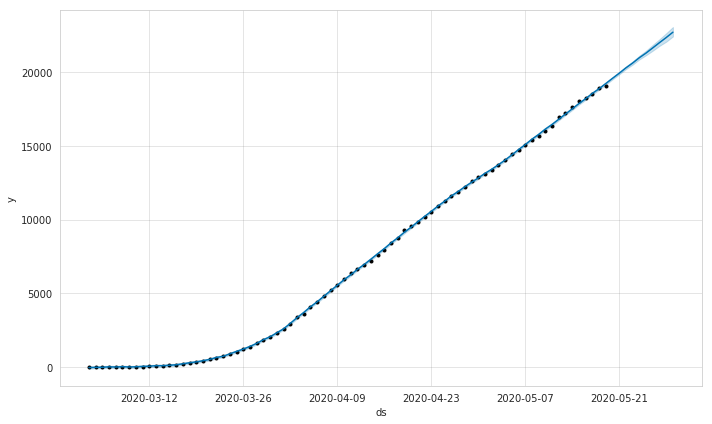

In [16]:
from fbprophet import Prophet

df_sick = pd.DataFrame([poland_covid_19_summary.Chorzy]).transpose()
df_sick.reset_index(inplace=True)
df_sick = df_sick.rename(columns={'Chorzy': 'y', 'date': 'ds'})



m = Prophet()
m.fit(df_sick)

future_sick = m.make_future_dataframe(periods=10)
forecast_sick = m.predict(future_sick)

fig1 = m.plot(forecast_sick)

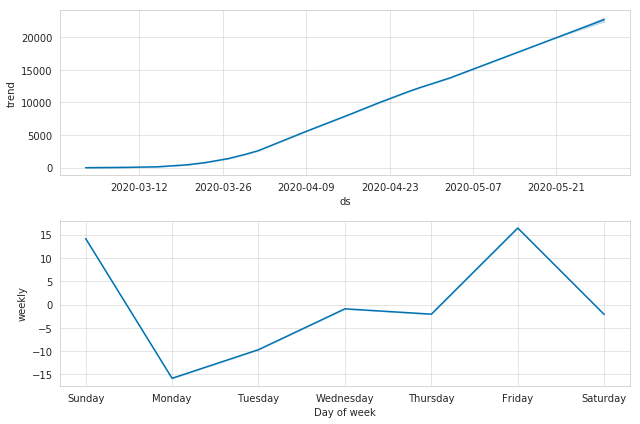

In [17]:
fig2 = m.plot_components(forecast_sick)


In [18]:
def add_dates(df, days_column, start_date='2020-03-03'):
    """Addd 'Dates' column to df."""
    start_date = pd.to_datetime(start_date)
    
    df['Date'] = df.apply(lambda x: start_date + pd.DateOffset(days=int(x[days_column])), axis=1)

pass

In [19]:
NUM_OF_DAYES = 60
ORDER = 1

In [20]:
from scipy.interpolate import InterpolatedUnivariateSpline

x = np.linspace(0, NUM_OF_DAYES, NUM_OF_DAYES + 1)
s = InterpolatedUnivariateSpline(range(0, len(df_sick.y)), df_sick.y, k=ORDER)
y = s(x)

sick_interpolated = pd.DataFrame(y, x, columns=['sick'])
sick_interpolated.index.name = 'day'
sick_interpolated.reset_index(inplace=True)

add_dates(sick_interpolated, 'day')

pass

In [21]:
PERIODS = 10

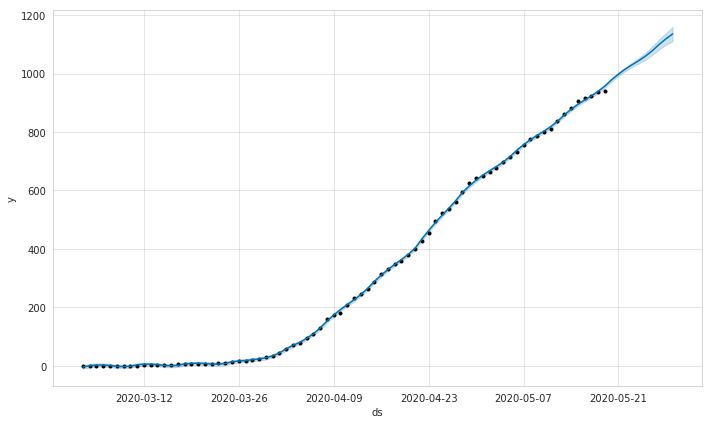

In [22]:
from fbprophet import Prophet

df_dead = pd.DataFrame([poland_covid_19_summary.Zmarli]).transpose()
df_dead.reset_index(inplace=True)
df_dead = df_dead.rename(columns={'Zmarli': 'y', 'date': 'ds'})

m = Prophet()
m.fit(df_dead)

future_dead = m.make_future_dataframe(periods=PERIODS)
forecast_dead = m.predict(future_dead)

fig3 = m.plot(forecast_dead)

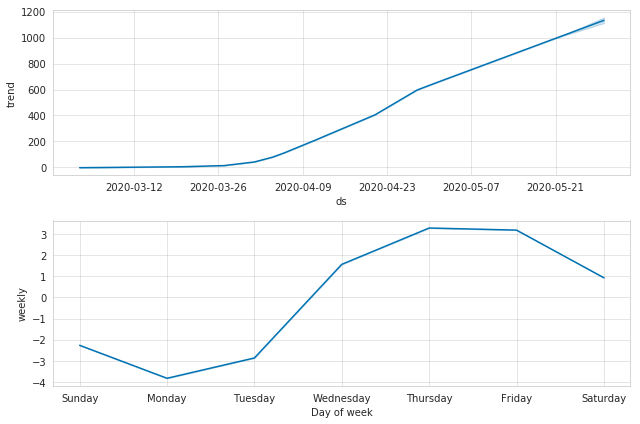

In [23]:
fig4 = m.plot_components(forecast_dead)

In [24]:
from scipy.interpolate import InterpolatedUnivariateSpline

x = np.linspace(0, NUM_OF_DAYES, NUM_OF_DAYES + 1)
s = InterpolatedUnivariateSpline(range(0, len(df_dead.y)), df_dead.y, k=ORDER)
y = s(x)

dead_interpolated = pd.DataFrame(y, x, columns=['dead'])
dead_interpolated.index.name = 'day'
dead_interpolated.reset_index(inplace=True)

add_dates(dead_interpolated, 'day')

pass

In [25]:
sick_prediction = go.Scatter(
    x = sick_interpolated.Date,
    y = sick_interpolated.sick,
    mode = "lines",
    name = "Chorzy",
    marker = dict(color = 'blue'))

dead_prediction = go.Scatter(
    x = dead_interpolated.Date,
    y = dead_interpolated.dead,
    mode = "lines",
    name = "Zgony",
    marker = dict(color = 'red'))

data = [sick_prediction, dead_prediction]
layout = dict(title = 'COVID-19 w Polsce - Prognoza',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Ludzie',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [26]:
poland_covid_19_summary.insert(0, 'Dzien', range(0, len(poland_covid_19_summary)))

In [27]:
sick_model = LinearRegression(fit_intercept=True)
poly = PolynomialFeatures(degree=8)
num_days_poly = poly.fit_transform(poland_covid_19_summary.Dzien.values.reshape(-1,1))
poly_reg = sick_model.fit(num_days_poly, poland_covid_19_summary.active.values.reshape(-1,1))
predictions_for_given_days = sick_model.predict(num_days_poly)

print("coef_ :",sick_model.coef_,"intercept_:",sick_model.intercept_)
pass

coef_ : [[ 0.00000000e+00 -2.22336254e+01  8.09839458e+00 -9.80025590e-01
   5.97062390e-02 -1.47972330e-03  1.60560160e-05 -6.39076828e-08
  -2.44426701e-12]] intercept_: [8.70497018]


In [28]:
today = poland_covid_19_summary.Dzien.iloc[-1]
print(f'Today is {today} day of pandemic in Poland')

tomorrow_value = today

for i in range(0, 2):
    tomorrow_value += 1

    value_prediction = poly.fit_transform(np.array([[tomorrow_value]]))
    prediction = sick_model.predict(value_prediction)
    print(f'Prediction for day number {tomorrow_value} : {prediction} cases ')


Today is 77 day of pandemic in Poland
Prediction for day number 78 : [[10167.27112579]] cases 
Prediction for day number 79 : [[10004.82011533]] cases 


In [29]:
dead_model = LinearRegression(fit_intercept=True)
poly = PolynomialFeatures(degree=8)
num_days_poly = poly.fit_transform(poland_covid_19_summary.Dzien.values.reshape(-1,1))
poly_reg = dead_model.fit(num_days_poly, poland_covid_19_summary.Zmarli.values.reshape(-1,1))
predictions_for_given_days = dead_model.predict(num_days_poly)

print("coef_ :",dead_model.coef_,"intercept_:",dead_model.intercept_)
pass

coef_ : [[ 0.00000000e+00 -1.91253662e+00  5.64446422e-01 -5.10732677e-02
   1.76663378e-03 -1.40250661e-05 -2.76218264e-07  5.28622577e-09
  -2.45519161e-11]] intercept_: [0.738583]


In [30]:
today = poland_covid_19_summary.Dzien.iloc[-1]
print(f'Today is {today} day of pandemic in Poland')

tomorrow_value = today

for i in range(0, 2):
    tomorrow_value += 1
    value_prediction = poly.fit_transform(np.array([[tomorrow_value]]))
    prediction = dead_model.predict(value_prediction)
    print(f'Prediction for day number {tomorrow_value} : {prediction} dead ')

Today is 77 day of pandemic in Poland
Prediction for day number 78 : [[960.35533291]] dead 
Prediction for day number 79 : [[968.93036489]] dead 


Model based on Emmanuelle Le Nagard and Alexandre Steyer work.
https://www.jstor.org/stable/40588987

NOTE: This is not pandemic model!

Based on https://www.kaggle.com/alixmartin/covid-19-predictions work

In [31]:
import math
def model(N, a, alpha, t):
    # we enforce N, a and alpha to be positive numbers using min and max functions
    return max(N, 0) * (1 - math.e ** (min(-a, 0) * t)) ** max(alpha, 0)

In [32]:
def model_loss(params):
    N, a, alpha = params
    model_x = []
    r = 0
    for t in range(len(poland_covid_19_summary)):
        r += (model(N, a, alpha, t) - poland_covid_19_summary.active.iloc[t]) ** 2
#         print(model(N, a, alpha, t), df.iloc[t, 0])
    return r 

Wspolczynniki modelu

In [33]:
import numpy as np
from scipy.optimize import minimize
opt = minimize(model_loss, x0=np.array([200000, 0.1, 15]), method='Nelder-Mead', tol=1e-5).x
opt

array([1.03974312e+04, 7.75378151e-02, 1.21058004e+01])

In [34]:
model_x = []
for t in range(len(poland_covid_19_summary)):
    model_x.append([poland_covid_19_summary.index[t], model(*opt, t)])
model_sim = pd.DataFrame(model_x, dtype=int)
model_sim.set_index(0, inplace=True)
model_sim.columns = ['Model']
pd.concat([poland_covid_19_summary, model_sim], axis=1)

model_sick_scatter = go.Scatter(
    x = model_sim.index,
    y = model_sim.Model,
    mode = "lines",
    name = "Chorzy (model)",
    marker = dict(color = 'red'))

data = [active_scatter, model_sick_scatter]
layout = dict(title = 'Model vs Rzeczywiste Dane COVID-19 w Polsce',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Ludzie',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

In [35]:
import datetime
start_date = poland_covid_19_summary.index[0]
n_days = 110
extended_model_x = []
for t in range(n_days):
    extended_model_x.append([start_date + datetime.timedelta(days=t), model(*opt, t)])
extended_model_sim = pd.DataFrame(extended_model_x, dtype=int)
extended_model_sim.set_index(0, inplace=True)
extended_model_sim.columns = ['Model']
pd.concat([extended_model_sim, poland_covid_19_summary], axis=1)

model_extended_sick_scatter = go.Scatter(
    x = extended_model_sim.index,
    y = extended_model_sim.Model,
    mode = "lines",
    name = "Chorzy (model)",
    marker = dict(color = 'red'))

beds_scatter = go.Scatter(
    x = extended_model_sim.index,
    y = [10000] * len(extended_model_sim.index),
    mode = "lines",
    name = "Respiratory",
    marker = dict(color = 'black'),
    line = dict(dash='dot'))

data = [active_scatter, model_extended_sick_scatter, beds_scatter]
layout = dict(title = 'Model dlugoterminowy COVID-19 w Polsce',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Ludzie',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

In [36]:
model_extended_sick_hard_scatter = go.Scatter(
    x = extended_model_sim.index,
    y = extended_model_sim.Model * 0.12,
    mode = "lines",
    name = "Ciezko chorzy (model)",
    marker = dict(color = 'red'))

resp_scatter = go.Scatter(
    x = extended_model_sim.index,
    y = [10000] * len(extended_model_sim.index),
    mode = "lines",
    name = "Respiratory",
    marker = dict(color = 'black'),
    line = dict(dash='dash'))

data = [resp_scatter, model_extended_sick_hard_scatter]
layout = dict(title = 'Model ciezko chorych COVID-19 w Polsce',
              xaxis= dict(title= 'Data',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Ludzie',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
pass

In [37]:
extended_model_sim[70:110]

,Model
0,
2020-05-12,9857.728077
2020-05-13,9897.088954
2020-05-14,9933.641590
2020-05-15,9967.577398
2020-05-16,9999.076040
2020-05-17,10028.305958
2020-05-18,10055.424904
2020-05-19,10080.580480
2020-05-20,10103.910669
